#### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Cardio Good Fitness Customer Analysis
### by Anthony Amabile
This is an analysis of the customers of the Cardio Good Fitness retail store. The goal of the analysis is to uncover insights about their customers and reccomendations to help the company in targeting new customers.

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
df = pd.read_csv('CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [13]:
df.shape

(180, 9)

In [14]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [17]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [15]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.00000,180.00000,180.00000,180.00000,180.00000,180.00000
mean,28.78889,15.57222,3.45556,3.31111,53719.57778,103.19444
std,6.94350,1.61705,1.08480,0.95887,16506.68423,51.86360
min,18.00000,12.00000,2.00000,1.00000,29562.00000,21.00000
25%,24.00000,14.00000,3.00000,3.00000,44058.75000,66.00000
50%,26.00000,16.00000,3.00000,3.00000,50596.50000,94.00000
75%,33.00000,16.00000,4.00000,4.00000,58668.00000,114.75000
max,50.00000,21.00000,7.00000,5.00000,104581.00000,360.00000


Observations
1. The customers from this product are young, median age of 26, 
2. The customers have are moderately healthy, with a median Fiteness level of 3 out of 5.  
3. The customers have middle class income, median of $50,596.
4. There is not a wide spread for all of the customer attributes.
5. The customers are relatively educated, with a median education level of 16 out of 21.


In [19]:
def missing_check(dataf):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df['Education'].count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_check(df)


,Total,Percent
Miles,0,0.00000
Income,0,0.00000
Fitness,0,0.00000
Usage,0,0.00000
MaritalStatus,0,0.00000
Education,0,0.00000
Gender,0,0.00000
Age,0,0.00000
Product,0,0.00000


In [55]:
income = df['Income']
usage = df['Usage']
fitness = df['Fitness']
miles = df['Miles']
marital_status = df['MaritalStatus']
education = df['Education']
gender = df['Gender']
age = df['Age']
product = df['Product']


#here is a more efficient and pythonic way of looking at the distribution of all variables
# import seaborn as sns

# for i in df.columns:
#     plt.figure(figsize=(7, 4))
#     sns.histplot(data=df, x=i)
#     plt.show()

(array([ 4., 15.,  6., 13., 11., 22., 19., 27., 10., 11.,  9.,  6.,  3.,
         2.,  0.,  3.,  0.,  2.,  1.,  2.,  8.,  1.,  1.,  1.,  3.]),
 array([ 29562.  ,  32562.76,  35563.52,  38564.28,  41565.04,  44565.8 ,
         47566.56,  50567.32,  53568.08,  56568.84,  59569.6 ,  62570.36,
         65571.12,  68571.88,  71572.64,  74573.4 ,  77574.16,  80574.92,
         83575.68,  86576.44,  89577.2 ,  92577.96,  95578.72,  98579.48,
        101580.24, 104581.  ]),
 <BarContainer object of 25 artists>)

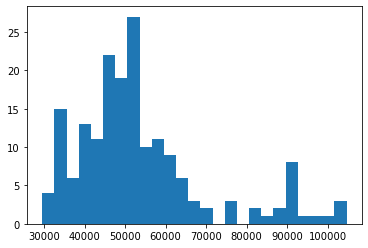

In [148]:
plt.hist(income, bins=25)


(array([33., 69., 52., 17.,  9.]),
 array([2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 5 artists>)

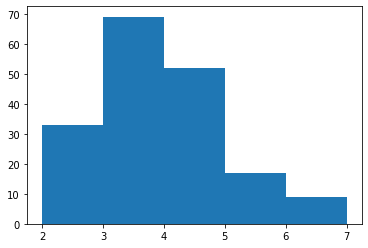

In [42]:
plt.hist(usage, bins=5)


(array([ 2., 26., 97., 24., 31.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

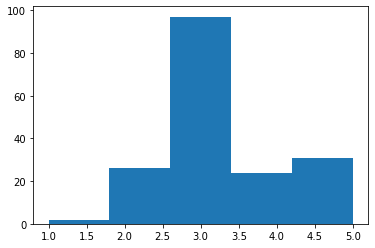

In [43]:
plt.hist(fitness, bins=5)

<AxesSubplot:xlabel='Income', ylabel='Density'>

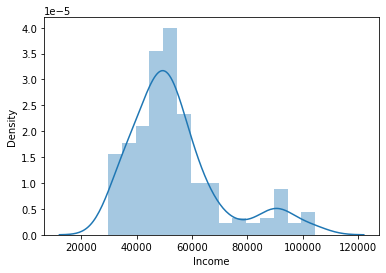

In [150]:
sns.distplot(income)

<AxesSubplot:xlabel='Usage', ylabel='Density'>

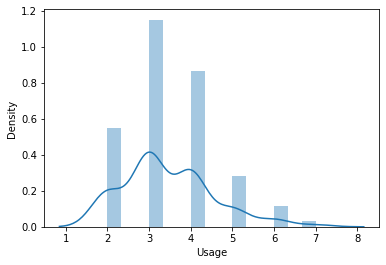

In [151]:
sns.distplot(usage)

Most users use the product 4 or less days of the week.

<AxesSubplot:xlabel='Fitness', ylabel='Density'>

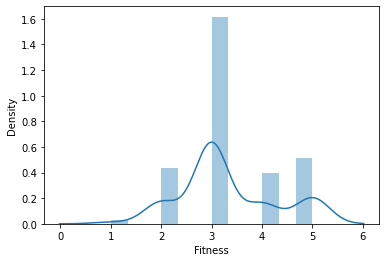

In [152]:
sns.distplot(fitness)

Most users are fitness level 3. Fitness level 3 is by far the most common fitness category.

<AxesSubplot:xlabel='Miles', ylabel='Density'>

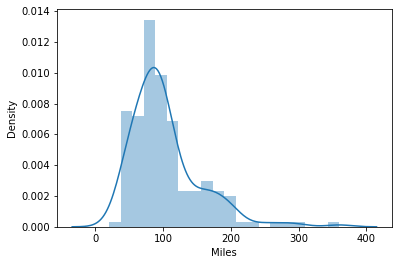

In [153]:
sns.distplot(miles)

Most users plan on riding 100 miles or less.

<AxesSubplot:xlabel='Education', ylabel='Density'>

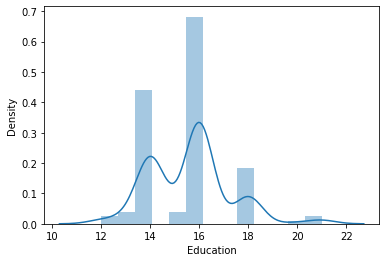

In [59]:

sns.distplot(education)


Customers are generally, fairly well-educated.

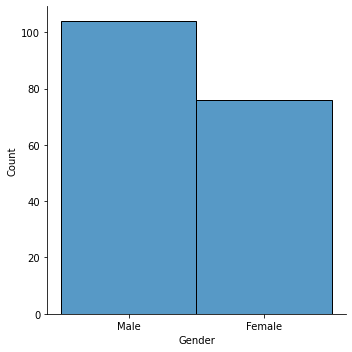

In [78]:

sns.displot(gender)


Customers are more likely to be male than female but not by much.

In [141]:
pd.options.display.float_format = "{:,.2f}".format
func = lambda x: 100*x.count()/df.shape[0]
pd.pivot_table(df[['Age','Gender']], columns='Gender', aggfunc=func)#/(len(df.index)))

Gender,Female,Male
Age,42.22,57.78


This percentage breakdown of gender of customers shows that just under 60% of customers are male.

In [147]:
pd.pivot_table(df[['MaritalStatus','Gender']], columns='MaritalStatus', aggfunc=func)

MaritalStatus,Partnered,Single
Gender,59.44,40.56


Percentage breakdown of marital status of customers. Most customers are partnered.

<AxesSubplot:xlabel='Age', ylabel='Density'>

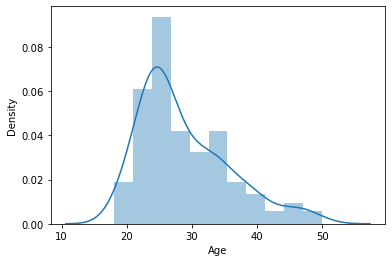

In [154]:

sns.distplot(age)


The age distribution is skewed towards the right, showing the vast majority of users are under 30.

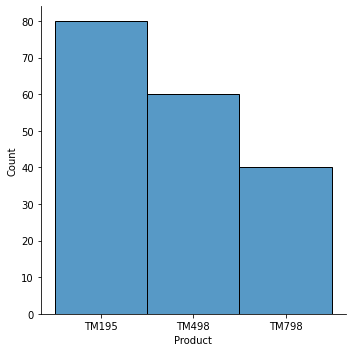

In [65]:
sns.displot(product)

The most commonly purchased product is TM195 and the least commonly purchased product is TM798.

<AxesSubplot:xlabel='Income', ylabel='Density'>

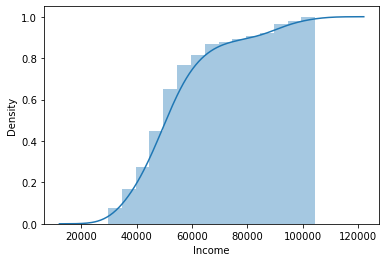

In [155]:
sns.distplot(income, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

The vast majority of customers have an income of $60k and below.

<AxesSubplot:xlabel='Usage', ylabel='Density'>

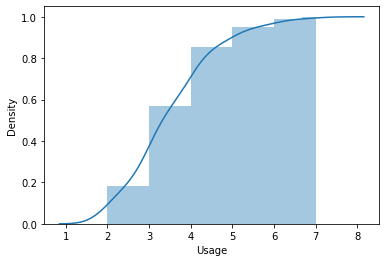

In [156]:
sns.distplot(usage, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

80% of customers consider their fitness to be 4 out of 5, with more than half considering their fitness level to be 3 or below.

<AxesSubplot:xlabel='Fitness', ylabel='Density'>

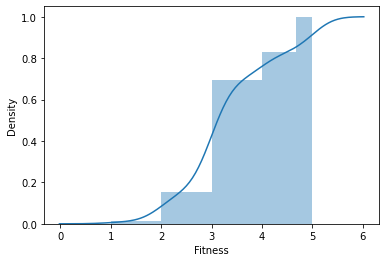

In [157]:
sns.distplot(fitness, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

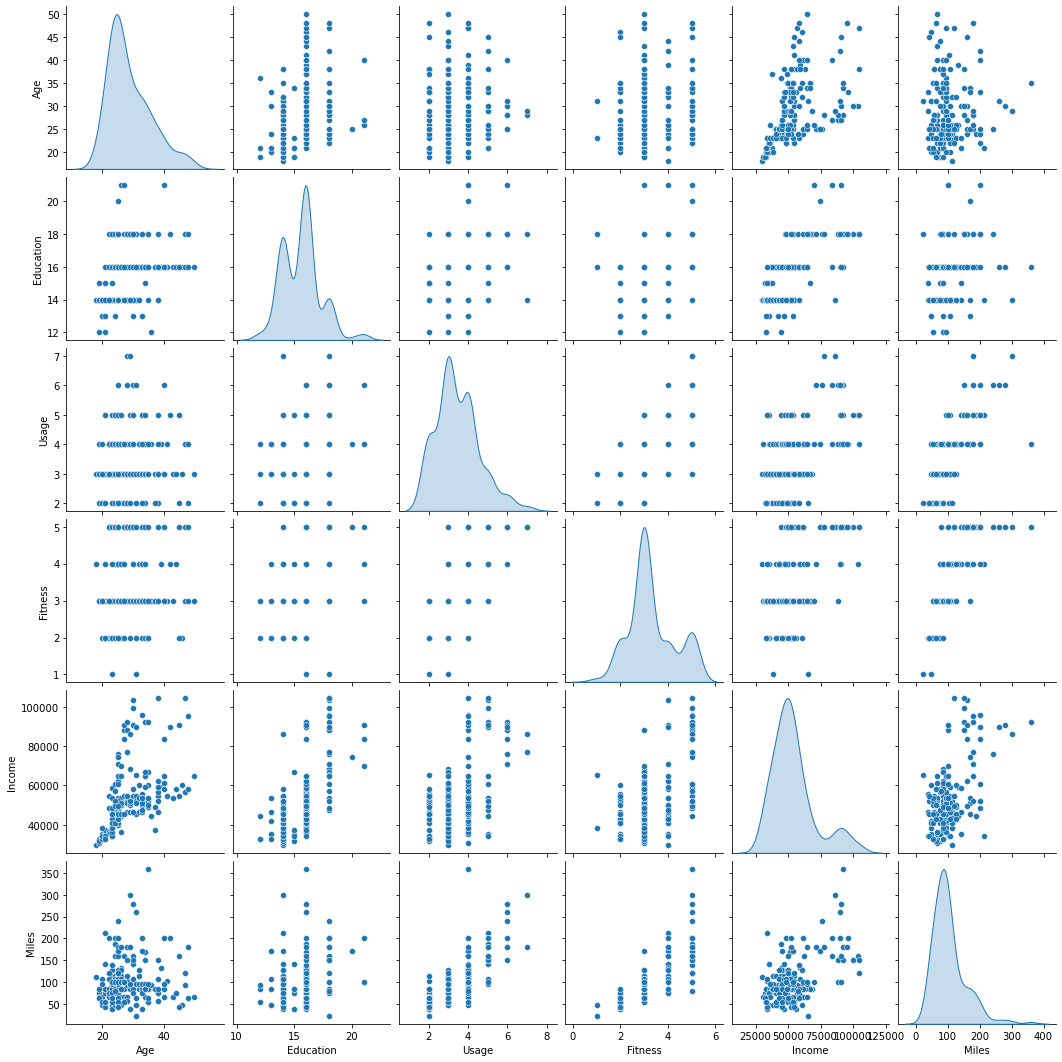

In [21]:
sns.pairplot(df, diag_kind='kde')

In [23]:
correlation = df.corr()
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00000,0.28050,0.01506,0.06110,0.51341,0.03662
Education,0.28050,1.00000,0.39516,0.41058,0.62583,0.30728
Usage,0.01506,0.39516,1.00000,0.66861,0.51954,0.75913
Fitness,0.06110,0.41058,0.66861,1.00000,0.53501,0.78570
Income,0.51341,0.62583,0.51954,0.53501,1.00000,0.54347
Miles,0.03662,0.30728,0.75913,0.78570,0.54347,1.00000


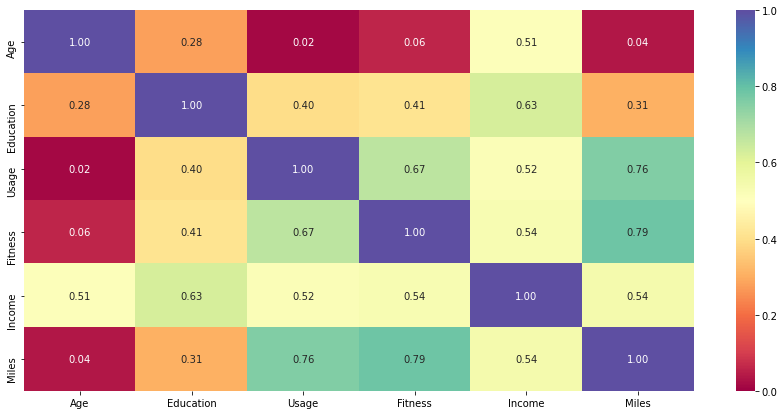

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(correlation, annot=True, vmin=0, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

There are several positive correlations of features of customers. Income is positively correlated with several other attributes including Age, Usage, Fitness, Miles, and Education. Fitness is fairly strongly correlated to usage; the more fit someone is, the more aept they are to want to use the product and vice versa. Miles seems to have the strongest two correlations in the dataset with the attributes Usage and Fitness, with fitness having the strongest correlation to miles.

<Figure size 1800x1080 with 0 Axes>

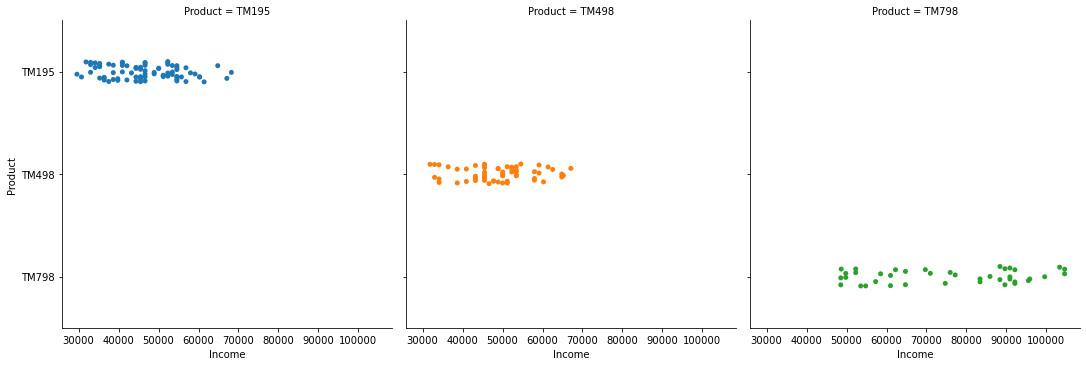

In [69]:
plt.figure(figsize=(25,15))
sns.catplot(x='Income', y='Product', data=df, estimator=sum, col='Product', kind='strip')


Different income levels seem to gravitate towards certain products. This is even more apparent in the below scatterplot:

<AxesSubplot:xlabel='Gender', ylabel='Product'>

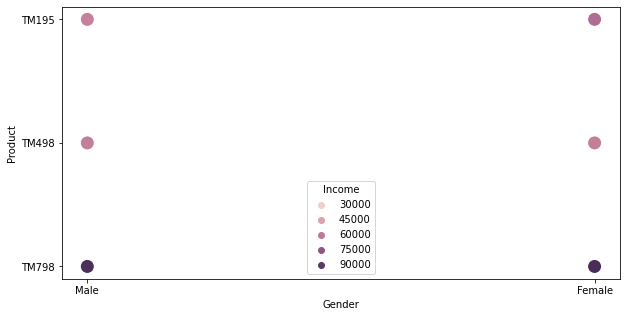

In [75]:
figure = plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Gender'], y=df['Product'], hue = df['Income'], s=200)

The highest income earners perfer the TM798. Low and middle income customers like the TM195 and TM498 about the same.

<AxesSubplot:xlabel='Gender', ylabel='Usage'>

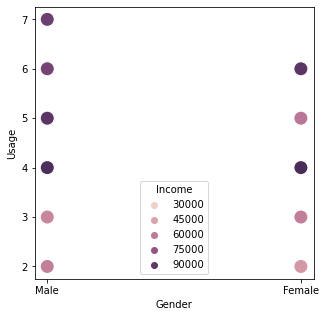

In [76]:
figure = plt.figure(figsize=(5,5))
sns.scatterplot(x=df['Gender'], y=df['Usage'], hue = df['Income'], s=200)

<AxesSubplot:xlabel='Gender', ylabel='Product'>

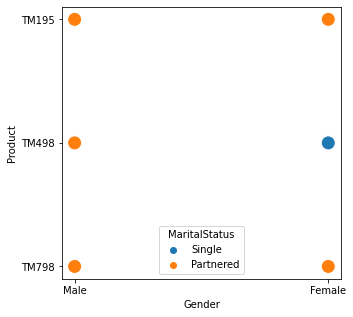

In [104]:
figure = plt.figure(figsize=(5,5))
sns.scatterplot(x=df['Gender'], y=df['Product'], hue = df['MaritalStatus'], s=200)

### Conclusion

* We can conclude that the wealthier customers perfer the TM798 while those with lower incomes perfer the other two products (TM195 and TM498).
* The fitter the customer is, the more likely they are to use the products and the more miles they will run.
* The customer base is fairly young, most being under 30.
* There are more male customers than female customers, but only slightly more, with 42% of customers being female.
* Similarly, the majority of customers have a partner with only 40% being single.

### Reccomendations
Cardio Good Fitness should target new customers by:
* Advertising their product at gyms and organized run races, focusing advertising for TM798 at upscale gyms and TM195 and TM498 at regular/average gyms as their customer base likes to maintain a decent level of fitness.
* Advertising their product at young alumni events or university alumni groups to capture early professionals.
* Using Facebook advertising to target younger users who have an interest in fitness and running.